# Homework Assignment 1

In [1]:
# Run this cell to install all required modules
!pip install numpy
!pip install matplotlib
!pip install scipy

In [3]:
import numpy as np

#### Problem 1. Evaluate the below algebraic expressions.

In [4]:
# Problem 0 - example
A = np.array([[1, 2], [3, 4]])
B = np.array([[1, 0], [0, 1]])
sol = A + B
print(sol)

[[2 2]
 [3 5]]


In [5]:
# Problem 1 (a)
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[5, 1, 3], [3, 2, 2]])
sol = A+B
print(sol)

[[6 3 6]
 [7 7 8]]


In [7]:
# Problem 1 (b)
A = np.array([[3, 1, 3], [1, 2, 2]])
B = np.array([[8, 2, 2], [4, 4, 6]])
sol = 2*A-0.5*B
print(sol)

[[2. 1. 5.]
 [0. 2. 1.]]


In [49]:
# Problem 1 (c)
A = np.array([[3, 1, 3], [1, 2, 3]])
B = np.array([[1, 5, 3], [5, 4, 1]])
sol = 0.5*(A+B)
print(sol)

[[2. 3. 3.]
 [3. 3. 2.]]


In [16]:
# Problem 1 (d)
A = np.array([[3, 1, 2], [1, 2, 3]])
B = np.array([[1, 1, 0], [2, 0, 1]])
sol = np.matmul(A, np.transpose(B))
print(sol)

[[4 8]
 [3 5]]


In [20]:
# Problem 1 (e)
A = np.array([[1, 3, 2], [6, 4, 5], [9, 8, 7]])
sol = np.trace(A)
print(sol)

12


In [17]:
# Problem 1 (f)
A = np.array([[3, 2], [-7, -5]])
sol = np.linalg.inv(A)
print(sol)

[[ 5.  2.]
 [-7. -3.]]


In [24]:
# Problem 1 (g)
A = np.array([[1, -3, 5], [-1, 4, -5], [-1, 3, -6]])
sol = np.linalg.inv(A)
print(sol)

[[ 9.  3.  5.]
 [ 1.  1.  0.]
 [-1. -0. -1.]]


In [47]:
# Problem 1 (h)
A = np.array([[1,3], [4, -5]])
sol = np.linalg.det(A)
print(sol)

-17.0


#### Problem 2. Solve the following systems of linear equations.

In [29]:
# Problem 2 (a)
# 2x + y = 5
# -x + 3y = 1
from sympy import Symbol, solve
x = Symbol('x')
y = Symbol('y')
equation1 = 2*x + y - 5
equation2 = -x + 3*y - 1
sol = solve((equation1, equation2), dict=True)
print(sol)

[{x: 2, y: 1}]


In [30]:
# Problem 2 (b)
# 5x + y - 2z = -4
# 2x + y + 5z = 1
# x - y + 2z = 1
from sympy import Symbol, solve
x = Symbol('x')
y = Symbol('y')
z = Symbol('z')
equation1 = 5*x + y - 2*z + 4
equation2 = 2*x + y + 5*z - 1
equation3 = x - y + 2*z - 1
sol = solve((equation1, equation2, equation3), dict=True)
print(sol)

[{x: -1/2, y: -1/2, z: 1/2}]


#### Problem 3. k-Means Clustering

In [39]:
import random as rd

In [36]:
# Problem 3 (a)
def euclidian_distance(a, b):
    """ 
    Takes two vectors and returns the Euclidean distance between them 
    Input: a - input vector a
           b - input vector b
    Output: the Euclidean distance between vectors a and b
    """
    distance = 0
    for i in range(len(a)):
        distance += (a[i]-b[i])**2
    return distance ** 0.5 

A = np.array([1, 2, 3])
B = np.array([5, 8, 9])
ans = euclidian_distance(A,B)
print(ans)

9.38083151964686


In [41]:
# Problem 3 (b)
def kmeans(X, K, max_iter=100, tol=0.00005, distance_metric=euclidian_distance):
    """
    K-Means clustering algorithm. 
    Input: X -         (comments are intentionally removed)
           K - 
           max_iter - 
           tol - 
           distance_metric - 
    Output: c -        (comments are intentionally removed)
            centroids - 
            log_centroids - 
            log_c - 
            log_sse - 
    """
    
    N, d = X.shape
    
    centroids = np.zeros((K, d))
    
    sse = np.Inf    # sum of squared error (objective)
    
    # for bookkeeping
    log_sse = []
    log_c = []
    log_centroids = []

    # initialization
    for k in range(K):
        rand_index = rd.randint(0, N-1)
        centroids[k] = X[rand_index]
    log_centroids.append(log_centroids)
    
    # main process
    for i in range(max_iter):
        
        # update the cluster membership
        c = []
        for n in range(N):
            dist_to_centroids = []
            
            for k in range(K):
                dist_to_centroids.append(distance_metric(X[n], centroids[k]))
            
            c.append(np.argmin(dist_to_centroids)) # cluster membership
        log_c.append(c)
        
        # update the centroids
        prev_centroids = centroids  # bookkeeping
        centroids = np.zeros((K, d))
        for k in range(K):
            tmp_sum = np.zeros(d)
            tmp_count = 0
            for n in range(N):
                if c[n] == k:
                    tmp_sum += X[n]
                    tmp_count += 1
            centroids[k] = tmp_sum / tmp_count
        log_centroids.append(centroids)
        
        # estimate the sum of the squared errors (sse)
        prev_sse = sse  # bookkeeping
        sse = 0
        for n in range(N):
            sse += distance_metric(X[n], centroids[c[n]]) ** 2
        log_sse.append(sse)
        
        # stopping criterion
        if prev_sse - sse < tol:
            break
    
    return c, centroids, log_centroids, log_c, log_sse
    

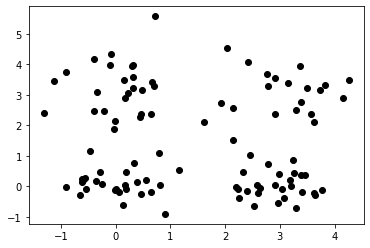

In [42]:
# Problem 3 (c)
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

def generate_random_data(N=100):
    """ 
    Generates a random dataset (multivariate normal) 
    Input: N - number of instances to create
    Output: X - generated (synthetic) dataset
    """
    
    means = [[0, 0], [3, 3], [0, 3], [3, 0]]
    covs = [[[0.5, 0], [0, 0.1]], [[0.5, 0], [0, 0.5]], 
            [[0.5, 0], [0, 1.0]], [[0.3, 0], [0, 0.3]]]

    X = np.zeros((N, 2))
    for n in range(N):
        seed = rd.randint(0, 3)
        X[n] = np.random.multivariate_normal(means[seed], covs[seed])
    
    return X

X = generate_random_data()
plt.scatter(X[:,0], X[:,1], c='k')


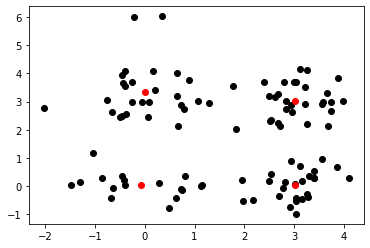

In [65]:
# Problem 3 (c) - part 1
# k = 4
X = generate_random_data()
[c, centroids, log_centroids, log_c, log_sse] = kmeans(X, 4, max_iter=100, tol=0.00005, distance_metric=euclidian_distance)
plt.scatter(X[:,0], X[:,1], c='k')
plt.scatter(centroids[:,0], centroids[:,1], c='red')

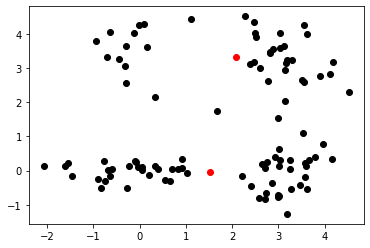

In [66]:
# Problem 3 (c) - part 2
# k = 2
X = generate_random_data()
[c, centroids, log_centroids, log_c, log_sse] = kmeans(X, 2, max_iter=100, tol=0.00005, distance_metric=euclidian_distance)
plt.scatter(X[:,0], X[:,1], c='k')
plt.scatter(centroids[:,0], centroids[:,1], c='red')

In [67]:
# Problem 3 (d)
my_data = np.genfromtxt('Mall_Customers.csv', delimiter=',', skip_header=1)
# print(my_data)
N, d = my_data.shape
print(N)
print(d)

from scipy import stats
stats.describe(my_data)

200
4


DescribeResult(nobs=200, minmax=(array([ 0., 18., 15.,  1.]), array([  1.,  70., 137.,  99.])), mean=array([ 0.56, 38.85, 60.56, 50.2 ]), variance=array([2.47638191e-01, 1.95133166e+02, 6.89835578e+02, 6.66854271e+02]), skewness=array([-0.24174689,  0.48191947,  0.31942368, -0.04686531]), kurtosis=array([-1.94155844, -0.68475139, -0.12589283, -0.83595827]))

In [ ]:
# Problem 3 (d)
def normalize(X):
    """
    mean-std normalization (standardization)
    Takes and applies a normalization on the input matrix X
    Input: X - data matrix (numpy array)
    Output: X_normalized - normalized data matrix
    """
    
   

In [ ]:
# Problem 3 (e)
""" TODO: Write your solution here """

In [ ]:
# Problem 3 (f)
""" TODO: Write your solution here """

In [ ]:
# Problem 3 (g) - Extra point
""" TODO: You may copy the kmeans() function from Problem 3(b) to here
         and modify it from this cell """